In [13]:

import pandas as pd 
import pyodbc
import warnings
warnings.simplefilter('ignore')
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [4]:
DB = {'servername': 'LAPTOP-3S422SS6\\SQLEXPRESS', 'database': 'DAD'}

conn_str = (
    'DRIVER={SQL Server};'
    'SERVER=' + DB['servername'] + ';'
    'DATABASE=' + DB['database'] + ';'
    'Trusted_Connection=yes;'
)

conn = pyodbc.connect(conn_str)

query = "SELECT * FROM ORDERR"
order = pd.read_sql_query(query, conn)

conn.close()

In [26]:
order['DATE_Order_date'] = pd.to_datetime(order['DATE_Order_date'])
order['Year'] = order['DATE_Order_date'].dt.year
order['Month'] = order['DATE_Order_date'].dt.month
order['Day'] = order['DATE_Order_date'].dt.day
order = order.drop('DATE_Order_date', axis=1) 

KeyError: 'DATE_Order_date'

In [27]:
order

,ORDER_number_id,ORDER_detail_id,ORDER_Quantity,ORDER_unit_Cost,ORDER_Unit_price,ORDER_Unit_sale_price,Totale_omzet,ORDER_gross_profit,ORDER_profit_margin,ORDER_profit_per_product,ORDER_discount_amount,PRODUCT_number,RETAILER_SITE_id,SALES_STAFF_id,Year,Month,Day
0,47737,1638,84,4.38,6.59,6.59,553.56,185.64,33.54,2,0.00,1,21,44,2020,8,16
1,47738,1159,126,4.38,6.59,6.59,830.34,278.46,33.54,2,0.00,1,9,50,2020,4,5
2,47739,1171,122,4.38,6.59,6.03,735.66,201.30,27.36,1,68.32,1,19,50,2020,4,16
3,47740,1154,122,4.38,6.59,6.59,803.98,269.62,33.54,2,0.00,1,4,50,2020,10,1
4,47741,1205,272,4.38,6.59,5.26,1430.72,239.36,16.73,0,361.76,1,21,43,2020,4,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43058,115289,7631,70,6.00,9.00,9.00,630.00,210.00,33.33,3,0.00,112,335,96,2022,1,9
43059,115290,7627,44,6.00,12.00,9.00,396.00,132.00,33.33,3,132.00,113,335,96,2022,9,9
43060,115291,7630,8,80.00,200.00,140.00,1120.00,480.00,42.86,60,480.00,114,335,96,2022,3,13
43061,115292,7631,24,5.00,10.00,10.00,240.00,120.00,50.00,5,0.00,115,335,96,2022,1,9


In [28]:
order_dummy = order[['ORDER_unit_Cost', 'ORDER_Unit_price', 'ORDER_Unit_sale_price', 'PRODUCT_number', 'RETAILER_SITE_id', 'SALES_STAFF_id', 'Year','Month','Year', 'ORDER_Quantity']]
df_encoded = pd.get_dummies(order_dummy, columns=['PRODUCT_number', 'RETAILER_SITE_id', 'SALES_STAFF_id'], drop_first=True)
df_encoded 

,ORDER_unit_Cost,ORDER_Unit_price,ORDER_Unit_sale_price,Year,Month,Year,ORDER_Quantity,PRODUCT_number_2,PRODUCT_number_3,PRODUCT_number_4,...,SALES_STAFF_id_114,SALES_STAFF_id_115,SALES_STAFF_id_116,SALES_STAFF_id_117,SALES_STAFF_id_118,SALES_STAFF_id_120,SALES_STAFF_id_121,SALES_STAFF_id_122,SALES_STAFF_id_123,SALES_STAFF_id_124
0,4.38,6.59,6.59,2020,8,2020,84,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4.38,6.59,6.59,2020,4,2020,126,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4.38,6.59,6.03,2020,4,2020,122,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4.38,6.59,6.59,2020,10,2020,122,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4.38,6.59,5.26,2020,4,2020,272,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43058,6.00,9.00,9.00,2022,1,2022,70,False,False,False,...,False,False,False,False,False,False,False,False,False,False
43059,6.00,12.00,9.00,2022,9,2022,44,False,False,False,...,False,False,False,False,False,False,False,False,False,False
43060,80.00,200.00,140.00,2022,3,2022,8,False,False,False,...,False,False,False,False,False,False,False,False,False,False
43061,5.00,10.00,10.00,2022,1,2022,24,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
X = df_encoded.drop('ORDER_Quantity', axis=1)  # Assuming 'Age' is the target variable
y = df_encoded[['ORDER_Quantity']]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)

In [31]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = reg_model.predict(X_test)

In [33]:
prediction_df = pd.DataFrame(y_pred, columns=['Predicted Quantity'])
y_test.reset_index(drop=True, inplace=True)
y_test_prediction_merge = pd.concat([y_test, prediction_df], axis=1)

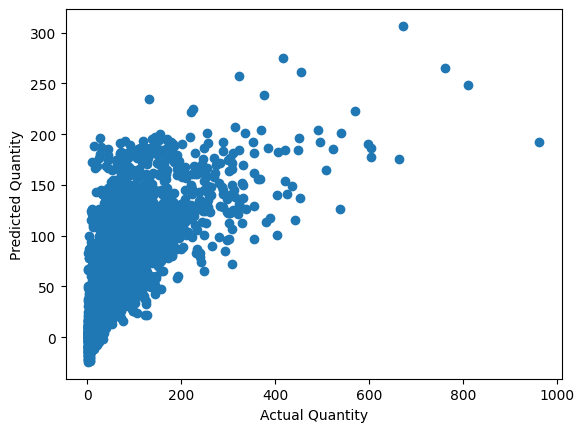

In [34]:
plt.scatter(y_test_prediction_merge['ORDER_Quantity'], y_test_prediction_merge['Predicted Quantity'])
plt.xlabel('Actual Quantity')
plt.ylabel('Predicted Quantity')
plt.show()

In [38]:
mse = mean_squared_error(y_test_prediction_merge['ORDER_Quantity'], y_test_prediction_merge['Predicted Quantity'])
mae = mean_absolute_error(y_test_prediction_merge['ORDER_Quantity'], y_test_prediction_merge['Predicted Quantity'])
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 1745.0085922382939
Mean Absolute Error: 22.345101287232094
